In [1]:
11

11

## 한글 font

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose   

## packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [4]:
from google.colab import drive
drive.mount('/content/mydrive/')

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).


## EDA를 통한 모델 수정 1.ipynb 따라 해보기
- 렌탈계 분포
> 1. 연도별 분포 
> 2. 월별 분포
> 3. 일별 분포
> 4. 요일별 분포

In [5]:
train = pd.read_csv('/content/mydrive/MyDrive/seoul-bike-rental-prediction/given-datasets/train.csv')
test = pd.read_csv('/content/mydrive/MyDrive/seoul-bike-rental-prediction/given-datasets/test.csv')

### 렌탈계 분포

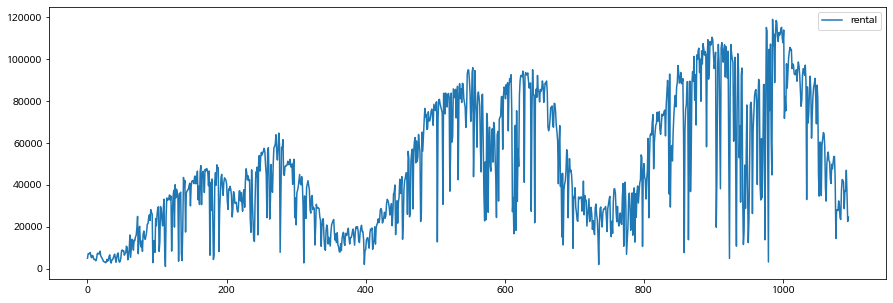

In [6]:
train[['rental']].plot(figsize=(15,5))
plt.show()

#### 연도별 분포

In [7]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')
train['year'] = train['date'].dt.year

In [8]:
train.groupby('year').mean()[['rental']]

,rental
year,
2018,27739.380822
2019,52395.464286
2020,64767.814208


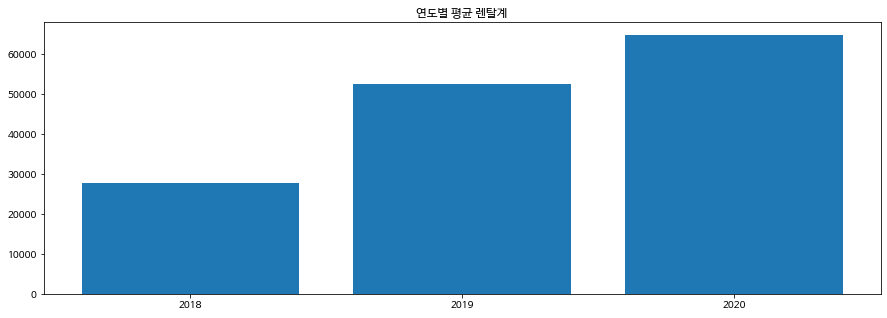

In [9]:
x = ['2018', '2019', '2020']
y = [train.groupby('year').mean()['rental'][2018],
     train.groupby('year').mean()['rental'][2019],
     train.groupby('year').mean()['rental'][2020]]

plt.figure(figsize=(15,5))
plt.title('연도별 평균 렌탈계')
plt.bar(x, y)
plt.show()

#### 월별 분포

In [10]:
train['month'] = train['date'].dt.month 

In [11]:
train.groupby('month').mean()[['rental']]

,rental
month,
1,15635.505376
2,16500.682353
3,31193.709677
4,47925.277778
5,61062.731183
6,69687.333333
7,62866.795699
8,52394.215054
9,71283.202247


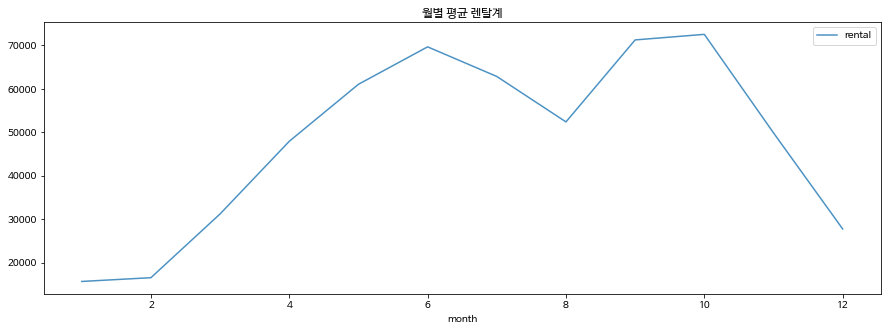

In [12]:
train.groupby('month').mean()[['rental']].plot(figsize=(15,5), alpha=0.8)
plt.title('월별 평균 렌탈계')
plt.show()

#### 일별 분포

In [13]:
train['day'] = train['date'].dt.day

In [14]:
train.groupby('day').mean()[['rental']]

,rental
day,
1,47270.722222
2,44958.638889
3,48367.194444
4,49988.250000
5,47851.472222
6,45287.194444
7,45393.428571
8,49403.527778
9,45949.444444


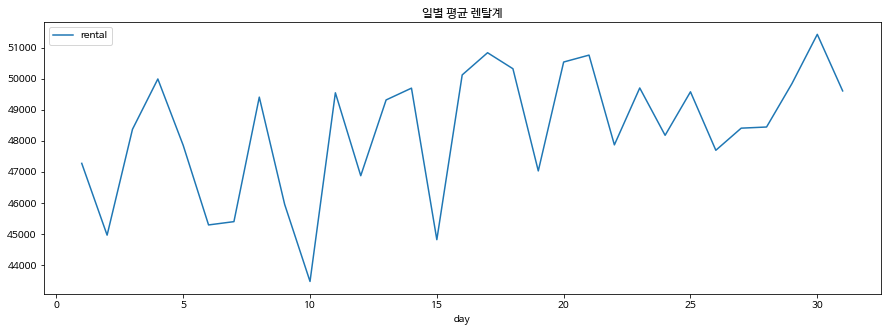

In [15]:
train.groupby('day').mean()[['rental']].plot(figsize=(15,5))
plt.title('일별 평균 렌탈계')
plt.show()

#### 요일별 분포

In [16]:
train['day_of_week'] = train['date'].dt.dayofweek

In [17]:
train.groupby('day_of_week').mean()[['rental']]

,rental
day_of_week,
0,47990.484076
1,50696.401274
2,48239.305732
3,48916.898089
4,50688.089744
5,48021.316129
6,43614.307692


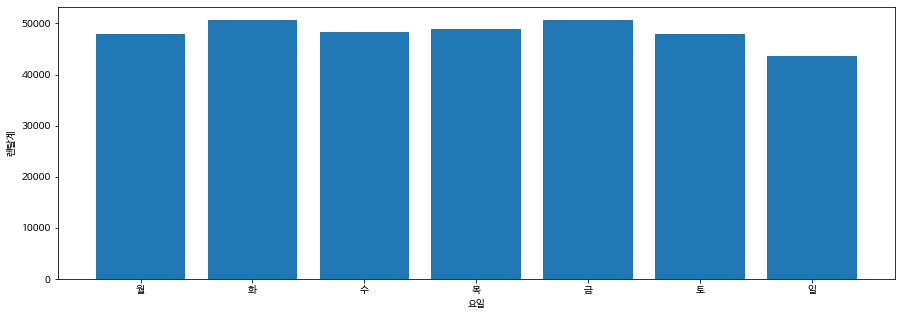

In [18]:
x = ['월', '화', '수', '목', '금', '토', '일']
y = [train.groupby('day_of_week').mean()['rental'][0],
     train.groupby('day_of_week').mean()['rental'][1],
     train.groupby('day_of_week').mean()['rental'][2],
     train.groupby('day_of_week').mean()['rental'][3],
     train.groupby('day_of_week').mean()['rental'][4],
     train.groupby('day_of_week').mean()['rental'][5],
     train.groupby('day_of_week').mean()['rental'][6],
     ]
plt.figure(figsize=(15,5))
plt.xlabel('요일')
plt.ylabel('렌탈계')
plt.bar(x, y)
plt.show()

#### 분포 시각화 결과 
- 연도별, 월별, 일별, 그리고 요일별로 서로 다른 분포를 보인다. 
- 따라서 year, month, day, day of week column을 train set과 test set에 추가한다.